In [1]:
import pandas as pd
import numpy as np

In [2]:
transaction=pd.read_excel(r'C:\Users\Ramki\Downloads\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
new_customer_list=pd.read_excel(r'C:\Users\Ramki\Downloads\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')
customer_demographic=pd.read_excel(r'C:\Users\Ramki\Downloads\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
customer_address=pd.read_excel(r'C:\Users\Ramki\Downloads\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

## Exploring the Transaction Dataset

In [3]:
transaction.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


* Looks like we need to work on the header 

In [4]:
new_header = transaction.iloc[0] 

transaction = transaction[1:] 

transaction.columns = new_header

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


* typecast the 'transaction_date' and 'product_first_sold_date' column

In [6]:
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'], unit='ns')
transaction['transaction_date'].head()

1   2017-02-25
2   2017-05-21
3   2017-10-16
4   2017-08-31
5   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [7]:
transaction['product_first_sold_date'] = pd.to_datetime(transaction['product_first_sold_date'], unit='s')
transaction['product_first_sold_date'].head()

1   1970-01-01 11:27:25
2   1970-01-01 11:35:01
3   1970-01-01 10:06:01
4   1970-01-01 10:02:25
5   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

* dates in the 'product_first_sold_date' column are all same with different timing. So We need to check with the SME regarding this.

In [8]:
transaction['transaction_id']=transaction.transaction_id.astype('int')
transaction['product_id']=transaction.product_id.astype('int')
transaction['customer_id']=transaction.customer_id.astype('int')

In [9]:
transaction['list_price']=transaction.list_price.astype('float')
transaction['standard_cost']=transaction.standard_cost.astype('float')

* typecasting features into proper format

In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Missing values Exploration

In [11]:
transaction.isna().mean().round(4)*100

0
transaction_id             0.00
product_id                 0.00
customer_id                0.00
transaction_date           0.00
online_order               1.80
order_status               0.00
brand                      0.98
product_line               0.98
product_class              0.98
product_size               0.98
list_price                 0.00
standard_cost              0.98
product_first_sold_date    0.98
dtype: float64

* We can drop or impute based on the problem we are working

### Identify duplicates

In [12]:
transaction.duplicated().sum()

0

* we don't have any duplicate entries in our dataset

### Explore the columns

In [13]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [14]:
transaction.online_order.value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [15]:
transaction.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [16]:
transaction.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [17]:
transaction.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [18]:
transaction.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [19]:
transaction.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

## Exploring the New customer list Dataset

In [20]:
new_customer_list.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


* As We don't have any label information for few features and We don't have SME to clarify our doubts regarding this let's drop those features

In [21]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_list = new_customer_list.drop(cols, axis=1)

* Looks like we need to work on the header 

In [22]:
new_customer_list.columns=new_customer_list.iloc[0] 

In [23]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1001 non-null   object
 1   last_name                            972 non-null    object
 2   gender                               1001 non-null   object
 3   past_3_years_bike_related_purchases  1001 non-null   object
 4   DOB                                  984 non-null    object
 5   job_title                            895 non-null    object
 6   job_industry_category                836 non-null    object
 7   wealth_segment                       1001 non-null   object
 8   deceased_indicator                   1001 non-null   object
 9   owns_car                             1001 non-null   object
 10  tenure                               1001 non-null   object
 11  address                              1001 n

### Missing values Exploration

In [24]:
new_customer_list.isna().mean().round(4)*100

0
first_name                              0.00
last_name                               2.90
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     1.70
job_title                              10.59
job_industry_category                  16.48
wealth_segment                          0.00
deceased_indicator                      0.00
owns_car                                0.00
tenure                                  0.00
address                                 0.00
postcode                                0.00
state                                   0.00
country                                 0.00
property_valuation                      0.00
Rank                                    0.00
Value                                   0.00
dtype: float64

* We can drop or impute based on the problem we are working

### Identify duplicates

In [25]:
new_customer_list.duplicated().sum()

0

* we don't have any duplicate entries in our dataset

### Typecasting into proper datatype

In [26]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312


In [27]:
new_customer_list.drop(index=0, inplace=True)

In [28]:
new_customer_list['past_3_years_bike_related_purchases']=new_customer_list.past_3_years_bike_related_purchases.astype('int')
new_customer_list['property_valuation']=new_customer_list.property_valuation.astype('int')
new_customer_list['Rank']=new_customer_list.Rank.astype('int')
new_customer_list['tenure']=new_customer_list.tenure.astype('int')
new_customer_list['postcode']=new_customer_list.postcode.astype('int')

new_customer_list['Value']=new_customer_list.Value.astype('float')

new_customer_list['DOB'] = pd.to_datetime(new_customer_list['DOB'])

In [29]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int32         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure      

### Explore columns

In [30]:
new_customer_list.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [31]:
# Replace 'U' with 'Unspecified'
new_customer_list['gender'].str.replace('U','Unspecified')

1         Male
2         Male
3       Female
4       Female
5       Female
         ...  
996       Male
997       Male
998     Female
999       Male
1000      Male
Name: gender, Length: 1000, dtype: object

In [32]:
new_customer_list.job_title.value_counts()

Associate Professor             15
Environmental Tech              14
Software Consultant             14
Chief Design Engineer           13
Cost Accountant                 12
                                ..
Systems Administrator III        1
Developer III                    1
Media Manager I                  1
Safety Technician II             1
Human Resources Assistant IV     1
Name: job_title, Length: 184, dtype: int64

In [33]:
new_customer_list.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [34]:
new_customer_list.owns_car.value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [35]:
new_customer_list.country.value_counts()

Australia    1000
Name: country, dtype: int64

In [36]:
new_customer_list.wealth_segment.value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

## Explore Customer Demographic dataset

In [37]:
customer_demographic.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


* Looks like we need to work on the header 

In [38]:
customer_demographic.columns=customer_demographic.iloc[0] 

In [39]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [40]:
customer_demographic.drop(index=0, inplace=True)

In [41]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

### Missing values Exploration

In [42]:
customer_demographic.isna().mean().round(4)*100

0
customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title                              12.65
job_industry_category                  16.40
wealth_segment                          0.00
deceased_indicator                      0.00
default                                 7.55
owns_car                                0.00
tenure                                  2.17
dtype: float64

* We can drop or impute based on the problem we are working

### Identify duplicates

In [43]:
customer_demographic.duplicated().sum()

0

* we don't have any duplicate entries in our dataset

### Typecasting into proper datatype

In [44]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [45]:
customer_demographic.default

1                                                      "'
2                            <script>alert('hi')</script>
3                                     2018-02-01 00:00:00
4       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
5                                                     NIL
                              ...                        
3996                                                 -100
3997                                             â¦testâ§
3998                                                  NaN
3999                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
4000                                                  0/0
Name: default, Length: 4000, dtype: object

* this feature 'default' having irrelaevent data, we can't clean it so we are dropping

In [46]:
customer_demographic.drop('default', axis=1, inplace=True)

In [47]:
customer_demographic['customer_id']=customer_demographic.customer_id.astype('int')
customer_demographic['past_3_years_bike_related_purchases']=customer_demographic.past_3_years_bike_related_purchases.astype('int')


In [48]:
customer_demographic['tenure']=customer_demographic.tenure.astype('float')

In [49]:
customer_demographic['DOB'] = pd.to_datetime(customer_demographic['DOB'])

### Explore columns

In [50]:
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [51]:
customer_demographic['gender']=customer_demographic['gender'].replace(('U', 'M', 'F', 'Femal'), ('Unspecified', 'Male', 'Female', 'Female'))

## Explore Customer Address dataset

In [52]:
customer_address.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


* Looks like we need to work on the header 

In [53]:
customer_address.columns=customer_address.iloc[0] 

In [54]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [55]:
customer_address.drop(index=0, inplace=True)

In [56]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 218.7+ KB


### Missing values Exploration

In [57]:
customer_address.isna().mean().round(4)*100

0
customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

* We dont have any null values

### Identify duplicates

In [58]:
customer_address.duplicated().sum()

0

* we don't have any duplicate entries in our dataset

### Typecasting into proper datatype

In [59]:
customer_address['customer_id']=customer_address.customer_id.astype('int')
customer_address['postcode']=customer_address.postcode.astype('int')
customer_address['property_valuation']=customer_address.property_valuation.astype('int')

# Merge all the customer related deatiles into one dataframe

In [60]:
new_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [61]:
new_customer_list.insert(0, 'customer_id', range(4001, 4001 + len(new_customer_list)))

In [62]:
new_customer_list.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
3,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [63]:
# Merge dataframes using the customer_id column 
customer_demographic = pd.merge(customer_demographic, customer_address, how='left', on='customer_id')

In [64]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [65]:
new_df = pd.concat([customer_demographic, new_customer_list], ignore_index=True, sort=False)

In [66]:
new_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,2 Sloan Way,2200.0,NSW,Australia,7.0,996.0,0.374
4996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,04 Union Crossing,2196.0,NSW,Australia,10.0,997.0,0.357
4997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,997.0,0.357
4998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19.0,57666 Victoria Way,4215.0,QLD,Australia,2.0,997.0,0.357


## EDA-Exploratiory Data Analysis

In [80]:
new_df['gender']=new_df['gender'].replace('U','Unspecified')

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

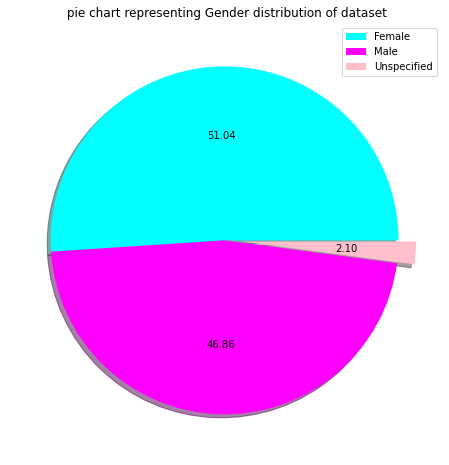

In [103]:
plt.rcParams['figure.figsize']=8,8
labels = 'Female', 'Male', 'Unspecified'
colors = ['cyan', 'magenta', 'pink']

plt.pie(new_df['gender'].value_counts(), colors=colors,
        explode = [0, 0, 0.1], shadow = True, autopct='%.2f')
plt.title(' pie chart representing Gender distribution of dataset')
plt.legend(labels=labels)
plt.show()

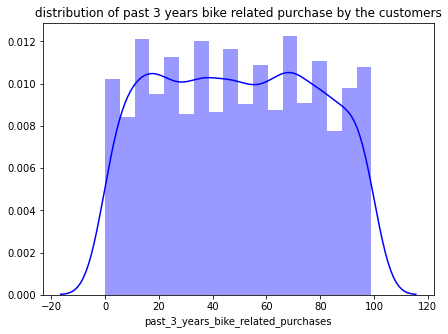

In [114]:
plt.rcParams['figure.figsize']=7,5
sns.distplot(new_df['past_3_years_bike_related_purchases'], color='blue')
plt.title('distribution of past 3 years bike related purchase by the customers')
plt.show()

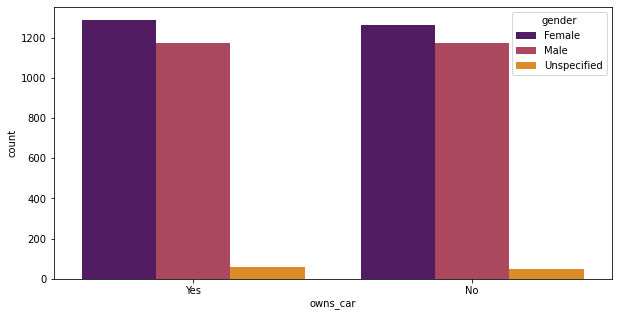

In [118]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(new_df['owns_car'], hue=new_df['gender'], palette='inferno')
plt.show()

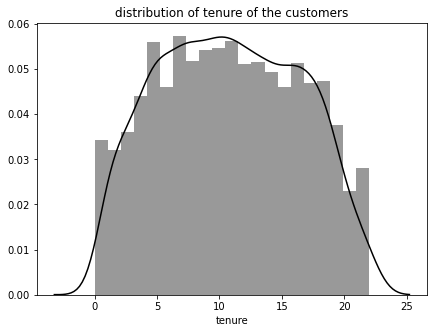

In [120]:
plt.rcParams['figure.figsize']=7,5
sns.distplot(new_df['tenure'], color='black')
plt.title('distribution of tenure of the customers')
plt.show()

In [122]:
new_df['wealth_segment'].value_counts()

Mass Customer        2508
High Net Worth       1272
Affluent Customer    1220
Name: wealth_segment, dtype: int64

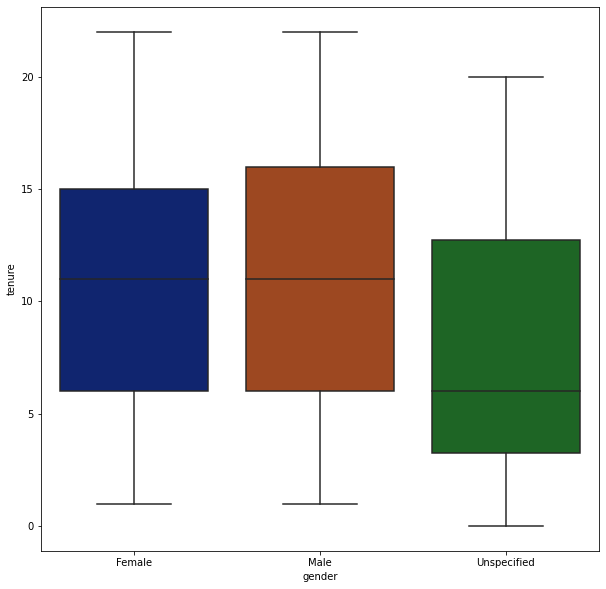

In [130]:
plt.rcParams['figure.figsize']=10,10

sns.boxplot(new_df['gender'], new_df['tenure'], palette='dark')
plt.show()

In [139]:
import datetime
now = datetime.datetime.now()
new_df['age'] = (now - new_df['DOB']).astype('<m8[Y]')

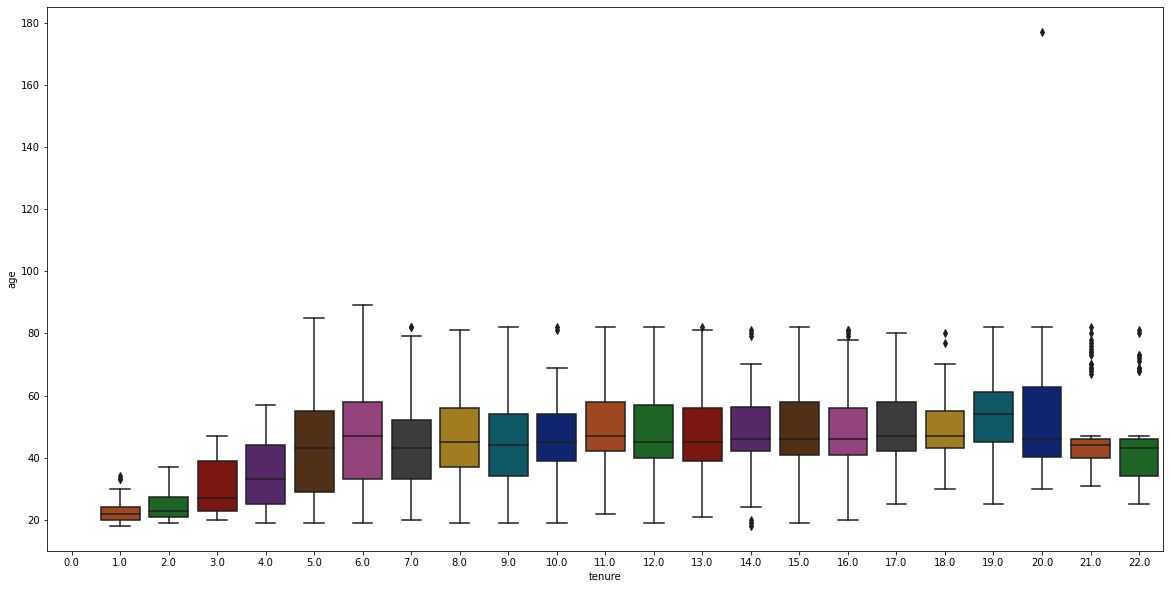

In [148]:
plt.rcParams['figure.figsize']=20,10

sns.boxplot(new_df['tenure'], new_df['age'], palette='dark')
plt.show()

In [150]:
new_df.to_excel("output.xlsx")